## Investigation of relationships between life expectancy and GDP

Research conducted based on data from the World Health Organization and the World Bank

Columns have the following meaning:

- Country - nation
- Year - the year of the observation
- Life expectancy at birth (years) - life expectancy value in years, further referred to as LE
- GDP - Gross Domestic Product in U.S. dollars

Further on we will:
- look at data distribution inside the life expectancy category
- look at data distribution inside the GDP category
- investigate pairwise relations between GDP, life expectancy, and year
- make some conclusions
- in-depth research of life expectancy relations

Import all needed libraries:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

## Data preparation

In [2]:
df = pd.read_csv('all_data.csv')
print(df.head()) 

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


For convenience purposes replace United States of America with USA

In [3]:
df.Country = df.Country.apply(lambda x: 'USA' if x == 'United States of America' else x)

Also, let's make a separate data frame for each country it will be useful for further investigation

In [4]:
Chile = df[df.Country == 'Chile']
China = df[df.Country == 'China']
Germany = df[df.Country == 'Germany']
Mexico = df[df.Country == 'Mexico']
USA = df[df.Country == 'USA']
Zimbabwe = df[df.Country == 'Zimbabwe']

## EDA

In [5]:
print(df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


Based on the data above one can conclude that LE is left-skewed. It indicates that either some country(s) have significantly different LE or for all counties, there were some years with a significant difference in LE. Same conclusion fair for GDP.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


We got a good dataset without missing data and with appropriate data formats.

Let's plot pairwise relationships in the dataset, it will give a quick overview of all relations between variables in the dataset (non-diagonal graphs) and data distribution inside variables (diagonal graphs).

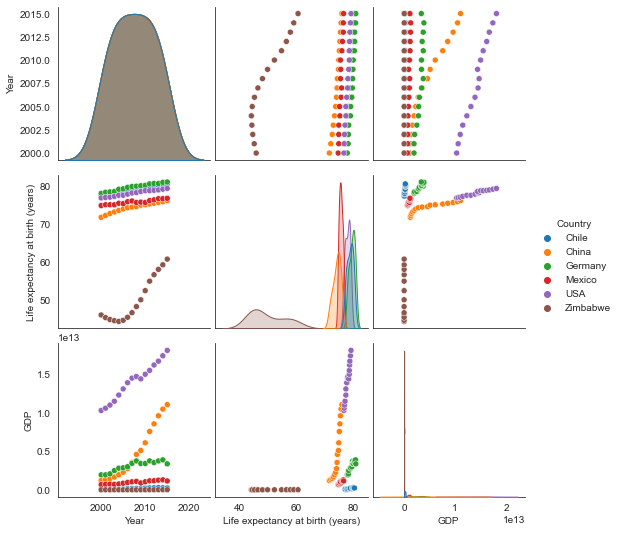

In [7]:
sns.set_style('white')
sns.color_palette('pastel')
sns.pairplot(df, hue  = 'Country') 

## Analysis

### Distribution of LE:

In [8]:
distribution_of_LE = df.groupby('Country').mean()
country = 'Country\n\n'
for i in distribution_of_LE.index:
    country += str(i) + '\n' + '\n'

LE_mean = 'LE mean\n\n'
for i in distribution_of_LE['Life expectancy at birth (years)']:
    LE_mean += str(round(i,2)) + '\n' + '\n'

distribution_of_LE = df.groupby('Country').min()
LE_min = 'LE min\n\n'
for i in distribution_of_LE['Life expectancy at birth (years)']:
    LE_min += str(round(i,2)) + '\n' + '\n'

distribution_of_LE = df.groupby('Country').max()
LE_max = 'LE max\n\n'
for i in distribution_of_LE['Life expectancy at birth (years)']:
    LE_max += str(round(i,2)) + '\n' + '\n'

Text(0.75, 0.25, 'LE max\n\n80.5\n\n76.1\n\n81.0\n\n76.7\n\n79.3\n\n60.7\n\n')

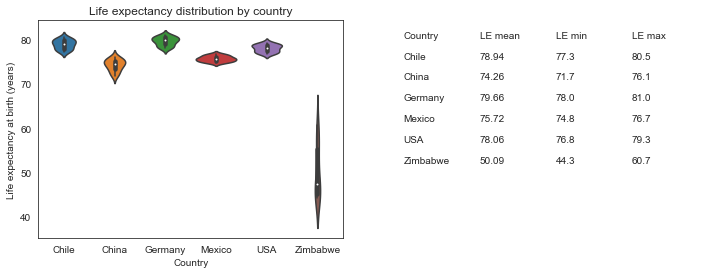

In [9]:
# Distribution of LE for each country
plt.figure(figsize = (12,4))
plt.subplot(121)
ax2 = sns.violinplot(data = df, x="Country", y = 'Life expectancy at birth (years)'  )
plt.title('Life expectancy distribution by country')

plt.subplot(122)
plt.axis('off')
sns.set_style('white')
plt.text(0.0,0.25, country)
plt.text(0.25,0.25, LE_mean)
plt.text(0.5,0.25, LE_min)
plt.text(0.75,0.25, LE_max)

**Zimbabwe has an extremely low average LE compared to other countries, it also has the biggest LE variance during the observation period. This country seems to be fundamentally different compared to all others in this research.**

Talking about other countries except for Zimbabwe:
- Germany has the highest average LE
- China has the lowest average LE
- China shoved the greatest LE variance
- Mexico shoved the lovest LE variance

### Distribution of GDP:

In [10]:
distribution_of_GDP = df.groupby('Country').mean()
country = 'Country\n\n'
for i in distribution_of_LE.index:
    country += str(i) + '\n' + '\n'

GDP_mean = 'GDP mean\n\n'
for i in distribution_of_GDP['GDP']:
    GDP_mean += str(round(i/10**13,4)) + '\n' + '\n'

distribution_of_GDP = df.groupby('Country').min()
GDP_min = 'GDP min\n\n'
for i in distribution_of_GDP['GDP']:
    GDP_min += str(round(i/10**13,4)) + '\n' + '\n'

distribution_of_GDP = df.groupby('Country').max()
GDP_max = 'GDP max\n\n'
for i in distribution_of_LE['GDP']:
    GDP_max += str(round(i/10**13,4)) + '\n' + '\n'

Text(0.95, 0.99, '* 10E13')

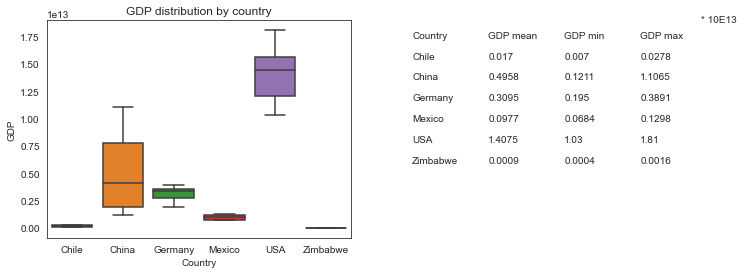

In [11]:
# distribution of GDP for each country
plt.figure(figsize = (12,4))
plt.subplot(121)
ax4 = sns.boxplot(data = df, x="Country", y = 'GDP'  )
plt.title('GDP distribution by country')
#plt.xticks(rotation=30)

plt.subplot(122)
plt.axis('off')
sns.set_style('white')
plt.text(0.0,0.25, country)
plt.text(0.25,0.25, GDP_mean)
plt.text(0.5,0.25, GDP_min)
plt.text(0.75,0.25, GDP_max)
plt.text(0.95,0.99, '* 10E13')

Over the observed period US has had the highest median GDP and significant GDP variance, China has the highest variance among all countries which indicates significant changes inside the country. The lovest GDP was for Zimbabwe with almost zero variance compare to other countries. **The average GDP for the reachest country(USA) is more than 1000 times bigger than for the poorest(Zimbabwe)**

### LE vs year and GDP vs year

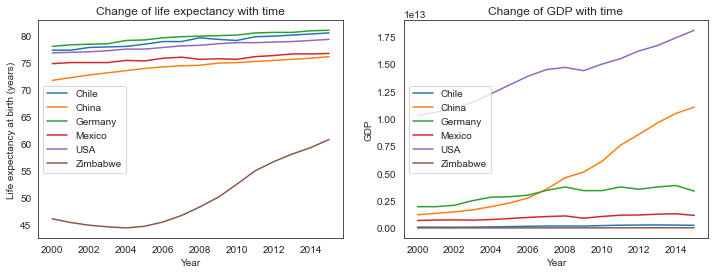

In [12]:
plt.figure(figsize = (12,4))

plt.subplot(121)
sns.lineplot(data = df, x='Year', y = 'Life expectancy at birth (years)', hue = 'Country')
plt.title('Change of life expectancy with time')
plt.legend(loc=6)

plt.subplot(122)
sns.lineplot(data = df, x='Year', y = 'GDP', hue = 'Country')
plt.title('Change of GDP with time')
plt.legend(loc=6)

The left graph shows the obvious growth of LE with time for all countries. Countries with high LE show slow growth(3-6 %) while the country with low LE shoved 33% growth.

The right graph shows that the US and China showed significant growth of GDP over time. Other countries also show some growth but not as strong as the US and China. It worth mention about the huge difference in GDP between different countries on the graph.

It is tempting to conclude that with GDP growth LE also growth but let's look at graphs closer before making any conclusion. 
**In general we can say that both LE and GDP are tending to grow with time.**

### LE vs GDP

Text(0.5, 1.0, 'LE vs GDP')

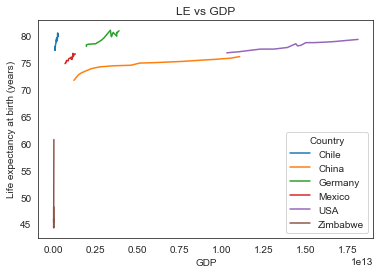

In [13]:
sns.lineplot(data = df, x= 'GDP', y = 'Life expectancy at birth (years)', hue = 'Country')
plt.title('LE vs GDP')

On the graph above Zimbabwe seems to be the obvious outlier, other countries are in a narrow range of LE (77 +- 5 years) while having big GDP differences.

Let's look closer at the US and Chile - countries with similar LE and different GDP.

<AxesSubplot:xlabel='Year', ylabel='GDP'>

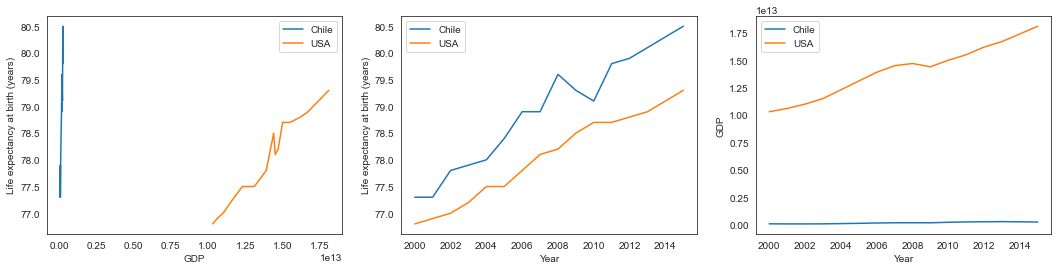

In [14]:
# LE vs GDP
plt.figure(figsize = (18,4))
plt.subplot(131)
sns.lineplot(data = Chile, x= 'GDP', y = 'Life expectancy at birth (years)', label = 'Chile')
sns.lineplot(data = USA, x= 'GDP', y = 'Life expectancy at birth (years)', label = 'USA')

# LE vs Time
plt.subplot(132)
sns.lineplot(data = Chile, x= 'Year', y = 'Life expectancy at birth (years)', label = 'Chile')
sns.lineplot(data = USA, x= 'Year', y = 'Life expectancy at birth (years)', label = 'USA')

# GDP vs Time
plt.subplot(133)
sns.lineplot(data = Chile, x= 'Year', y = 'GDP', label = 'Chile')
sns.lineplot(data = USA, x= 'Year', y = 'GDP', label = 'USA')

Look at the right graph, GDP is growing for both countries over time (may chack info for Chile in appendix sections of this research). Now, look at the middle graph: LE growth for both countries as well. One can conclude: growth of GDP causes the growth of LE (the higher GDP the higher LE). So one would expect a country with higher GDP to have higher LE. But that is not the case. Chile has 100 times lower GDP than the US,  at the same time it has 5 years higher LE than the US which is well shown on the left graph. **So there is no obvious/direct dependency between LE and GDP**

*On one hand higher GDP means more money for science, medical researches, better technologies, easier access to high-quality medical services that positively impact LE. From another hand, big GDP is often connected with industry, different manufacturers, productions that are often harmful to the environment and ecology therefore negatively impacting LE. Constant stress connected with earning money in a permanent competitive environment also tends to different illnesses.* 

**So GDP has a controversial impact on life expectancy and it is hard to estimate which one is stronger. The proportion of positive/negative influence of GDP may vary for different countries.**

*In my opinion LE is a very complex concept that depends on many factors: ecology, political situation (war/peace), economic situation (people starving/have access to food), diseases, and many others. Different countries have different sets of values of parameters that influence LE so I think it is not correct to directly compare LE in different countries in the context of its dependency on GDP.*

## conclusions
- **Zimbabwe has an extremely low average LE compared to other countries, it also has the biggest LE variance during the observation period. This country seems to be fundamentally different compared to all others in this research.**
- **The average GDP for the reachest country(USA) is more than 1000 times bigger than for the poorest(Zimbabwe).**
- **Both LE and GDP are tending to grow with time.**
- **There is no obvious/direct dependency between LE and GDP.**
- **GDP has a controversial impact on life expectancy and it is hard to estimate which one is stronger. The proportion of positive/negative influence of GDP may vary for different countries.**
  

## in-depth research (wider research)

As I mentioned different countries have different sets of values of parameters that influence LE. It is difficult to separate GDP from other parameters to be able to investigate its individual influence.
We can try to estimate the cumulative influence of all parameters within one country. I suggest making the following simulation:
- Null theory: there is no factor(s) that can influence LE.
- threshold point = 0.05
- Set basic population equal to the population at beginning of observation(the year 2000)
- After 15 years (end of observation) we took one more sample from the same population and measured a new mean for LE.
- Now we want to understand if a new LE could be observed among samples that could have been taken from the basic population or it should have come from a different population.
  
One sample t-test suits the best to answer this question. The only problem is that we don't actually have the last sample. We have only it's mean for LE so we can't conduct this test directly. But we can use The Central Limit Theorem. Let's do the following steps:
- simulate 10 000 samples of size 100 taken from basic population
- build a distribution of the mean values of the samples from the previous step
- calculate the p-value for the last sample(end of observation)

#### Simulate 10 000 samples of size 100 taken from basic population 

So we have a base population(population at the year 2000)(in code below referred to as base_sample) with a given mean value. If we would take 10000 samples of size 100 from it then according to CLT mean values of these samples would form a normally distributed dataset(in code below referred to as final_sample)with mean equal to the base population mean and standard error equal to base_population_std/sample_size**0.5. After 15 years we take another sample from the same base population whose(sample's)mean should lay somewhere in the final_sample. 
Let's do some code:

p =  0.0012


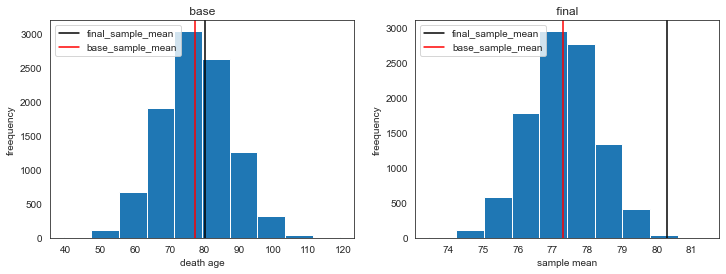

In [15]:
# simulation is based on data for Chile
# simulation parameters:
number_of_samples = 10000
sample_size = 100
base_sample_mean= 77.3 # mean LE for the country at year 2000
final_sample_mean = 80.3 # mean LE for the country at year 2015 = mean for final_sample
base_sample_std = 10 # standart deviation for base_population (there is 2 wys to astimate it: by simple brootforce and by Chebyshev's theorem)
final_sample_std = base_sample_std/sample_size**0.5 # standard error

# base_sample simulation. no info will be used from this graph, just for comparison and visualization
base_sample = np.random.normal(base_sample_mean, scale=base_sample_std, size=number_of_samples)
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.axvline(x=final_sample_mean, color='k', label = 'final_sample_mean')
plt.axvline(x=base_sample_mean, color='r', label = 'base_sample_mean')
plt.hist(base_sample)
plt.title(' base ')
plt.xlabel('death age')
plt.ylabel('freequency')
plt.legend(loc = 2)

# final_sample simulation
final_sample = np.random.normal(base_sample_mean, scale=final_sample_std, size=number_of_samples)
plt.subplot(122)
plt.axvline(x=final_sample_mean, color='k', label = 'final_sample_mean')
plt.axvline(x=base_sample_mean, color='r', label = 'base_sample_mean')
plt.hist(final_sample)
plt.title(' final ')
plt.xlabel('sample mean')
plt.ylabel('freequency')
plt.legend(loc = 2)

p = np.count_nonzero(final_sample> final_sample_mean)/number_of_samples
#print(sorted(final_sample))
print('p = ', p)

P is less than 0.05 so we can reject our null theory and conclude that there is a positive correlation between LE and the cumulative effect of impacting factors. We may think about the cumulative effect of impacting factors as actions taken by governments to lead their nations to wellness.

For all countries set of factors that influence LE should be more - less the same. Each country has its values of these factors (one has good ecology and low GDP, other vice versa). Let's build a plot LE vs country to take a look at different sets of values of factors. 

<AxesSubplot:xlabel='Country', ylabel='Life expectancy at birth (years)'>

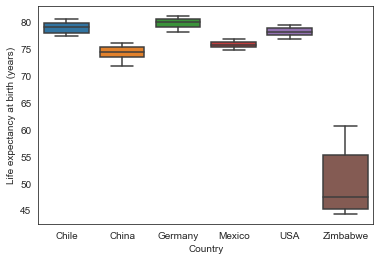

In [16]:
sns.boxplot(data = df, x= 'Country', y = 'Life expectancy at birth (years)',)
#plt.xticks(rotation='30')

On the graph above Zimbabwe have significantly lower LE than other countries but it cant be explained only by low GDP. Chile has similar GDP but shoves one of the highest LE.

## Appendix

**LE distribution**

Text(0.5, 1.0, 'Life expectancy distribution by country')

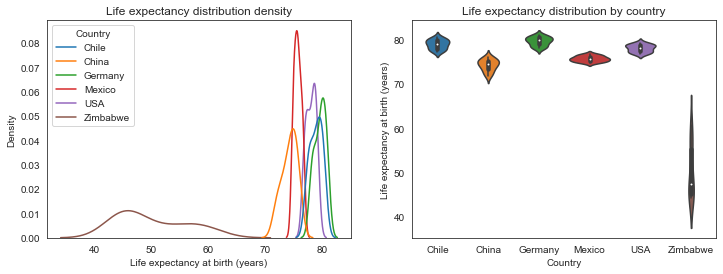

In [17]:
plt.figure(figsize = (12,4))
plt.subplot(121)
ax1 = sns.kdeplot(data = df, x = 'Life expectancy at birth (years)' , hue = 'Country' )
plt.title('Life expectancy distribution density')

plt.subplot(122)
ax2 = sns.violinplot(data = df, x="Country", y = 'Life expectancy at birth (years)'  )
plt.title('Life expectancy distribution by country')

Both graphs above shove LE distribution.

An attentive reader may notice that shape of 'violins' on the violin graph the same as the shape of peaks on the left graph rotated by 90 degrees, the height of 'violin' equals the bottom width of the peak.

A high peak for Mexico means low variance of LE in that country during the observed period and vice versa for Zimbabwe low peace means high variance of LE.

Our guess from EDA got some proof. One country(Zimbabwe) has significantly lower LE than others(median less than 50) and it(LE) has been significantly changing during the observed period. While other countries have closer LE medians. Among top countries, Germany has the highest LE median, the lowest for China. China also showed the biggest variance of LE median, Mexico shoved the lowest variance of LE median.

**GDP distribution**

Text(0.5, 1.0, 'GDP distribution by country')

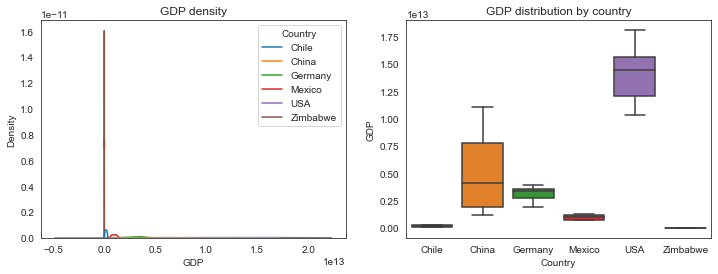

In [18]:
plt.figure(figsize = (12,4))
plt.subplot(121)
ax3 = sns.kdeplot(data = df, x = 'GDP' , hue = 'Country' )
plt.title('GDP density')

plt.subplot(122)
ax4 = sns.boxplot(data = df, x="Country", y = 'GDP'  )
plt.title('GDP distribution by country')
#plt.xticks(rotation=30)

Both graph above shove GDP distribution

The left graph is hard to read because of Zimbabwe's peak, it shows an extremely low variance of GDP for this country during the observed period compared to other countries. The right graph proves this conclusion.

Over the observed period US has had the highest median GDP and significant GDP variance, China has the highest variance among all countries which indicates significant changes inside the country.

**Chile US comparison**

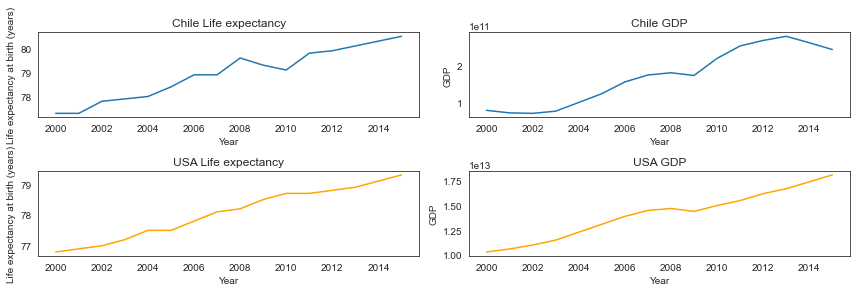

In [19]:
# Chile LE
plt.figure(figsize = (12,4))
plt.subplot(221)
sns.lineplot(data = Chile, x= 'Year', y = 'Life expectancy at birth (years)')
plt.title('Chile Life expectancy')

# Chile GDP
plt.subplot(222)
sns.lineplot(data = Chile, x= 'Year', y = 'GDP')
plt.title('Chile GDP')

# USA Life expectancy
plt.subplot(223)
sns.lineplot(data = USA, x= 'Year', y = 'Life expectancy at birth (years)', color = 'orange')
plt.title('USA Life expectancy')

# USA GDP
plt.subplot(224)
sns.lineplot(data = USA, x= 'Year', y = 'GDP', color = 'orange') 
plt.title('USA GDP')
plt.tight_layout()